# Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

# Reading the datasets

In [2]:
data=pd.read_csv('XSSTraining.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19122 entries, 0 to 19121
Data columns (total 66 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Contains &lt                 19122 non-null  int64  
 1   ScripTag                     19122 non-null  int64  
 2   Readable                     19122 non-null  int64  
 3   Contains "><                 19122 non-null  int64  
 4   Contains '><                 19122 non-null  int64  
 5   Contains And                 19122 non-null  int64  
 6   Contains Percentage          19122 non-null  int64  
 7   Contains Slash               19122 non-null  int64  
 8   Contains BackSlash           19122 non-null  int64  
 9   Contains Plus                19122 non-null  int64  
 10  Contains Document            19122 non-null  int64  
 11  Contains Window              19122 non-null  int64  
 12  Contains Onload              19122 non-null  int64  
 13  Contains Onerror

# Label Encoding the String Values

In [4]:
for i in data.columns:
    if data[i].dtype=='object': 
        le = LabelEncoder()
        le.fit(list(data[i].values))
        data[i] = le.transform(data[i].values)
        
data.head()        

,Contains &lt,ScripTag,Readable,"Contains ""><",Contains '><,Contains And,Contains Percentage,Contains Slash,Contains BackSlash,Contains Plus,...,Contains Duble Slash,Contains Vertical Bar,Contains Power,Contains Broken Bar,Contains Alert,Contains Break Line,Letters Ratio,Numbuers Ratio,Symbols Ratio,Class
0,0,1,1,1,0,0,0,1,0,0,...,1,0,0,0,1,0,0.7614,0.0114,0.2273,1
1,0,1,1,1,0,0,0,1,0,0,...,1,0,0,0,1,0,0.7614,0.0114,0.2273,1
2,0,1,1,1,0,0,0,1,0,0,...,1,0,0,0,1,0,0.7203,0.0593,0.2203,1
3,0,1,0,0,0,1,1,1,0,1,...,1,0,0,0,1,0,0.7071,0.1065,0.1864,1
4,0,1,1,0,0,0,1,1,0,0,...,1,0,0,0,1,0,0.7158,0.1053,0.1789,1


# Finding the correlation between class and rest of the columns

In [5]:
data.corr().abs()['Class'].sort_values(ascending = False)

Class                     1.000000
Contains Alert            0.825814
ScripTag                  0.751401
Contains Less Than        0.715939
Contains Question Mark    0.686817
                            ...   
Contains DIV              0.019918
Contains Grave            0.008989
Contains Hash             0.002743
Contains And              0.001702
Readable                  0.001522
Name: Class, Length: 66, dtype: float64

# Plotting

In [6]:
#Histograms

array([[<AxesSubplot:title={'center':'Contains &lt'}>,
        <AxesSubplot:title={'center':'ScripTag'}>,
        <AxesSubplot:title={'center':'Readable'}>,
        <AxesSubplot:title={'center':'Contains "><'}>,
        <AxesSubplot:title={'center':"Contains '><"}>,
        <AxesSubplot:title={'center':'Contains And'}>,
        <AxesSubplot:title={'center':'Contains Percentage'}>,
        <AxesSubplot:title={'center':'Contains Slash'}>],
       [<AxesSubplot:title={'center':'Contains BackSlash'}>,
        <AxesSubplot:title={'center':'Contains Plus'}>,
        <AxesSubplot:title={'center':'Contains Document'}>,
        <AxesSubplot:title={'center':'Contains Window'}>,
        <AxesSubplot:title={'center':'Contains Onload'}>,
        <AxesSubplot:title={'center':'Contains Onerror'}>,
        <AxesSubplot:title={'center':'Contains DIV'}>,
        <AxesSubplot:title={'center':'Contains iframe'}>],
       [<AxesSubplot:title={'center':'Contains img'}>,
        <AxesSubplot:title={'center':

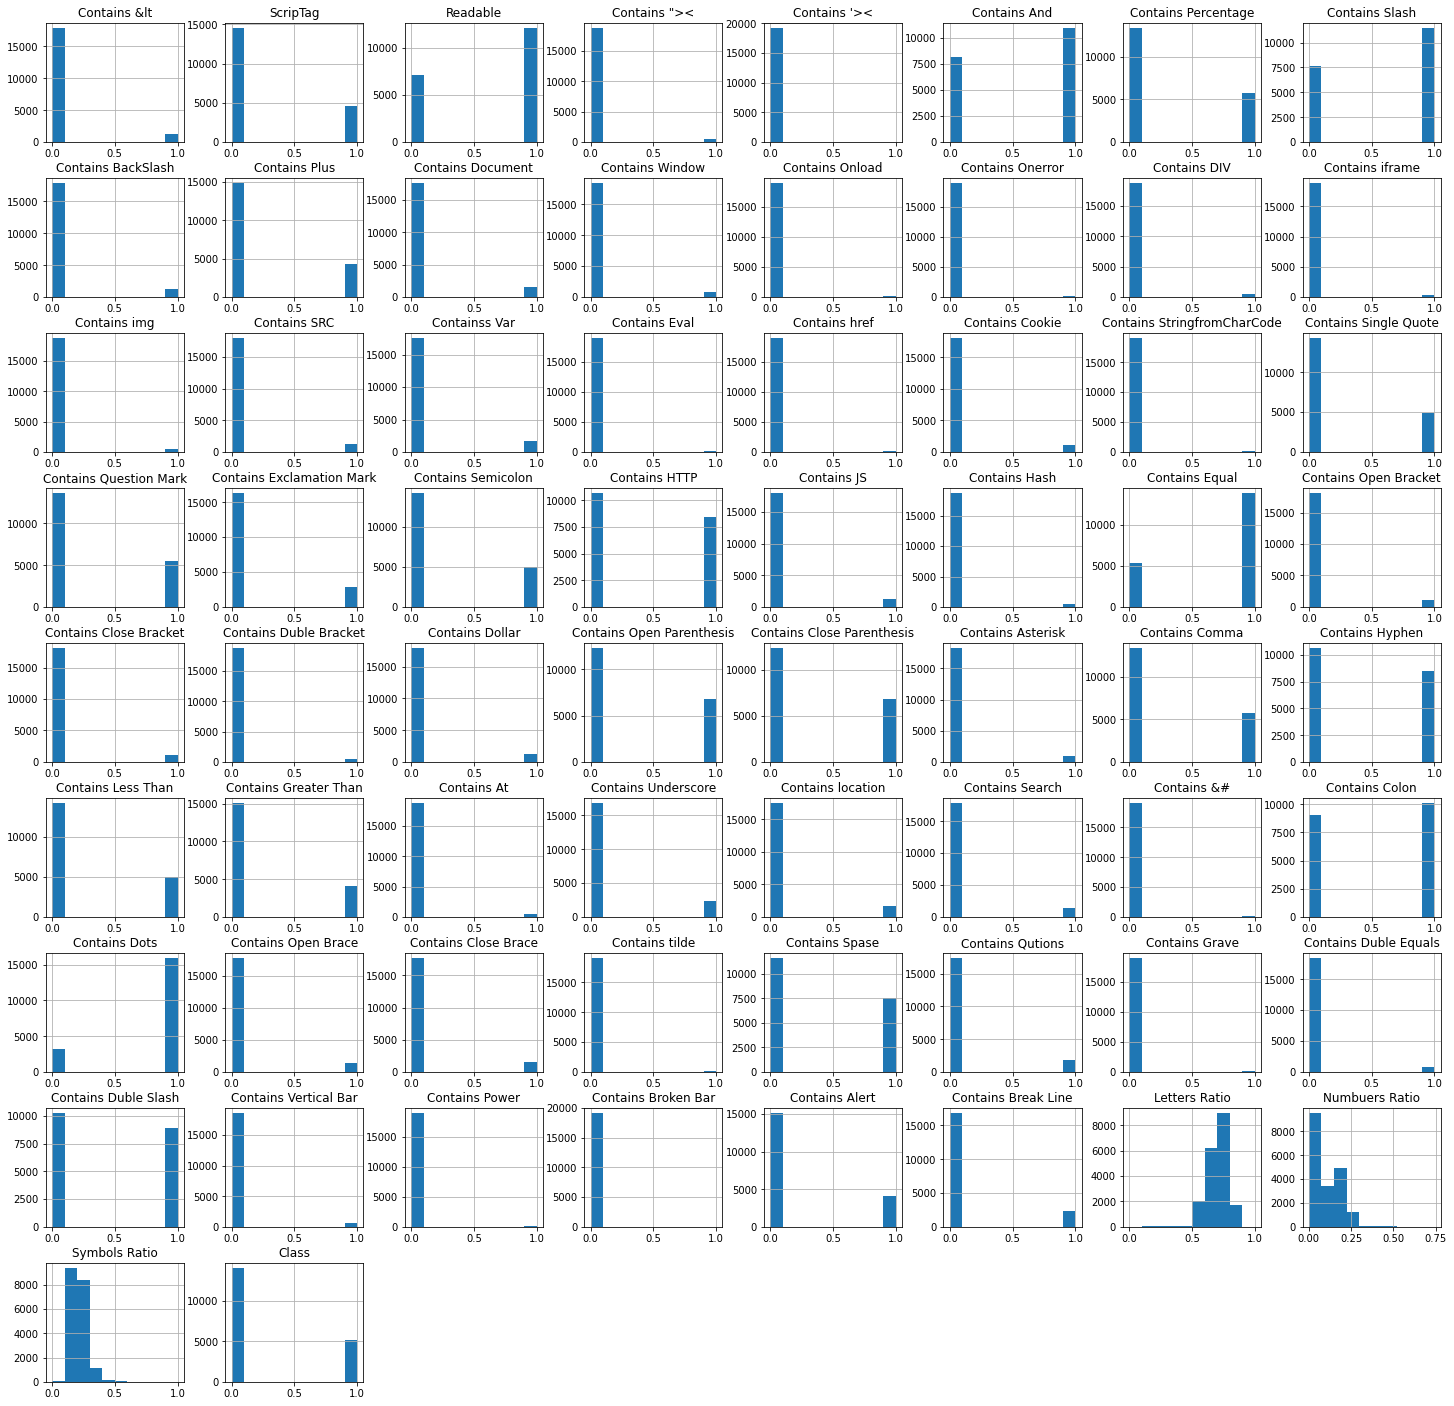

In [7]:
data.hist(figsize=(25,25))

In [8]:
X=data.drop(['Class'],axis='columns')
y=data['Class']

In [9]:
X.shape

(19122, 65)

In [10]:
from sklearn.preprocessing import MinMaxScaler 
sc=MinMaxScaler()
X= sc.fit_transform(X)

# DNN_Model

In [11]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [12]:
model=keras.Sequential([keras.layers.Dense(400,input_shape=(65,),activation='relu'),
                        keras.layers.Dense(200,input_shape=(400,),activation='relu'),
                        keras.layers.Dense(100,input_shape=(200,), activation='relu'),
                        keras.layers.Dense(50,input_shape=(100,),activation='relu'),
                        keras.layers.Dense(1,activation='sigmoid')
    
])
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X,y,epochs=10)

Epoch 1/10
598/598 [==============================] - 4s 3ms/step - loss: 0.0463 - accuracy: 0.9847
Epoch 2/10
598/598 [==============================] - 2s 3ms/step - loss: 0.0193 - accuracy: 0.9933
Epoch 3/10
598/598 [==============================] - 2s 3ms/step - loss: 0.0142 - accuracy: 0.9955
Epoch 4/10
598/598 [==============================] - 2s 3ms/step - loss: 0.0126 - accuracy: 0.9955
Epoch 5/10
598/598 [==============================] - 2s 3ms/step - loss: 0.0110 - accuracy: 0.9963
Epoch 6/10
598/598 [==============================] - 2s 3ms/step - loss: 0.0093 - accuracy: 0.9969
Epoch 7/10
598/598 [==============================] - 2s 3ms/step - loss: 0.0092 - accuracy: 0.9968
Epoch 8/10
598/598 [==============================] - 2s 3ms/step - loss: 0.0071 - accuracy: 0.9974
Epoch 9/10
598/598 [==============================] - 2s 3ms/step - loss: 0.0075 - accuracy: 0.9975
Epoch 10/10
598/598 [==============================] - 2s 3ms/step - loss: 0.0062 - accuracy: 0.9981

# Loading the testing data

In [13]:
testing_data=pd.read_csv('XSSTesting.csv')

In [14]:
for j in testing_data.columns:
    if testing_data[j].dtype=='object': 
        le2 = LabelEncoder()
        le2.fit(list(testing_data[j].values))
        testing_data[j] = le.transform(testing_data[j].values)
        
testing_data.head()   

,Contains &lt,ScripTag,Readable,"Contains ""><",Contains '><,Contains And,Contains Percentage,Contains Slash,Contains BackSlash,Contains Plus,...,Contains Duble Slash,Contains Vertical Bar,Contains Power,Contains Broken Bar,Contains Alert,Contains Break Line,Letters Ratio,Numbuers Ratio,Symbols Ratio,Class
0,0,1,0,0,0,0,1,1,0,0,...,1,0,0,0,1,1,0.68,0.11,0.2069,1
1,0,1,0,0,0,1,1,1,0,0,...,1,0,0,0,1,1,0.70,0.08,0.2242,1
2,0,0,1,0,0,1,1,1,0,0,...,1,0,0,0,0,1,0.76,0.05,0.1849,1
3,0,1,1,0,0,1,1,1,1,0,...,1,0,0,0,1,1,0.75,0.02,0.2285,1
4,0,1,0,0,0,1,1,1,0,0,...,1,0,0,0,1,1,0.70,0.08,0.2242,1


In [15]:
X_test=testing_data.drop(['Class'],axis='columns')
sc2=MinMaxScaler()
X_test= sc2.fit_transform(X_test)

In [16]:
prediction=model.predict(X_test)

In [17]:
print(prediction)

[[1.0000000e+00]
 [1.0000000e+00]
 [9.9996722e-01]
 ...
 [1.9802419e-13]
 [3.9890668e-04]
 [6.8595876e-12]]


# Model_Summary

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 400)               26400     
_________________________________________________________________
dense_1 (Dense)              (None, 200)               80200     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_3 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 51        
Total params: 131,801
Trainable params: 131,801
Non-trainable params: 0
_________________________________________________________________


# Model_Evaluation

In [19]:
model.evaluate(X_test,testing_data.Class)

753/753 [==============================] - 1s 1ms/step - loss: 0.0021 - accuracy: 0.9993


[0.00211272481828928, 0.99925297498703]